In [1]:
import cv2

In [2]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 7.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=3a46b53d4334218d234cc538fe7ba95801ab1170af93d3290b0bf0b850beba15
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [3]:
img=cv2.imread("/content/633322d33a072576bda1011d813cd3ab.jpg")

In [4]:
import matplotlib.pyplot as plt

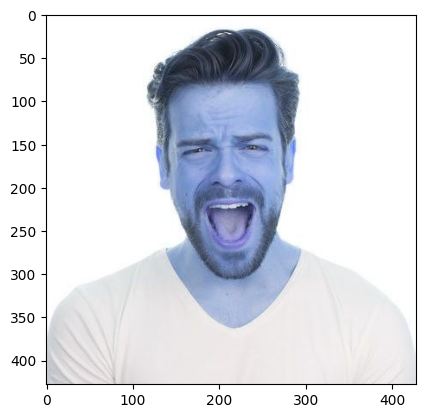

In [5]:
plt.imshow(img)

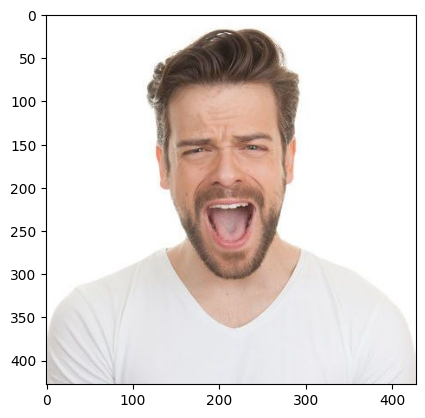

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
!pip install DeepFace


In [14]:
from deepface import DeepFace

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


In [17]:
predictions

[{'emotion': {'angry': 2.983427030852679,
   'disgust': 4.811345986884354,
   'fear': 59.35086719404068,
   'happy': 28.940234057931193,
   'sad': 1.230755129397527,
   'surprise': 2.4551301396048237,
   'neutral': 0.22824160215903547},
  'dominant_emotion': 'fear',
  'region': {'x': 122,
   'y': 88,
   'w': 171,
   'h': 171,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.91,
  'age': 28,
  'gender': {'Woman': 0.00026813709155248944, 'Man': 99.99973773956299},
  'dominant_gender': 'Man',
  'race': {'asian': 0.011377991177141666,
   'indian': 0.1464263186790049,
   'black': 0.014327846292871982,
   'white': 77.812659740448,
   'middle eastern': 12.285207957029343,
   'latino hispanic': 9.72999632358551},
  'dominant_race': 'white'}]

In [20]:
print(predictions[0]['dominant_emotion'])

fear


In [21]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

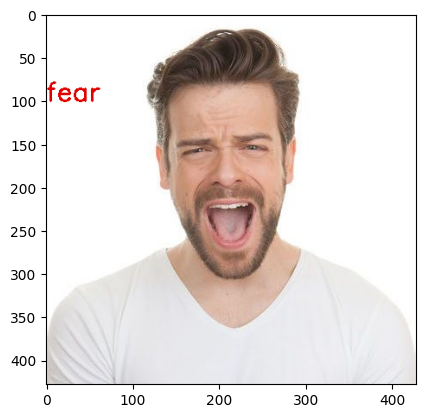

In [22]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,predictions[0]['dominant_emotion'],(0,100),font,1,(0,0,225),2,cv2.LINE_4)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [23]:
import cv2
from deepface import DeepFace
face_values=cv2.CascadeClassifier(cv2.data.haarcascades+'/content/haarcascade_frontalface_default (2).xml')
video=cv2.VideoCapture(0)
while video.isOpened():
  _,frame=video.read()
  gray_img=cv2.cvColor(frame,cv2.COLOR_BGR2GRAY)
  face=face_values.detectMultiScale(gray_img,scaleFactor=1.1,minNeighbor=5)
  for x , y,w,h in face:
    img=cv2.rectangle(frame,(x,y),(x+y,y+h),(0,225,225),1)
    try:
      analyze=DeepFace.analyze(frame,actions=['emotion'])
      print(analyze['dominant+emoyion'])
    except:
      print("no face")
      cv2.imshow('video',frame)
      if key==cv2.waitKey(1):
        if key==ord('v'):
          break
video.release()